<a href="https://colab.research.google.com/github/ConstantineAshik/Cse366/blob/main/366Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/city_day.csv")

In [ ]:
df = data
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
duplicate = df[df.duplicated()]
duplicate

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket


In [ ]:
df.isnull()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


<Axes: >

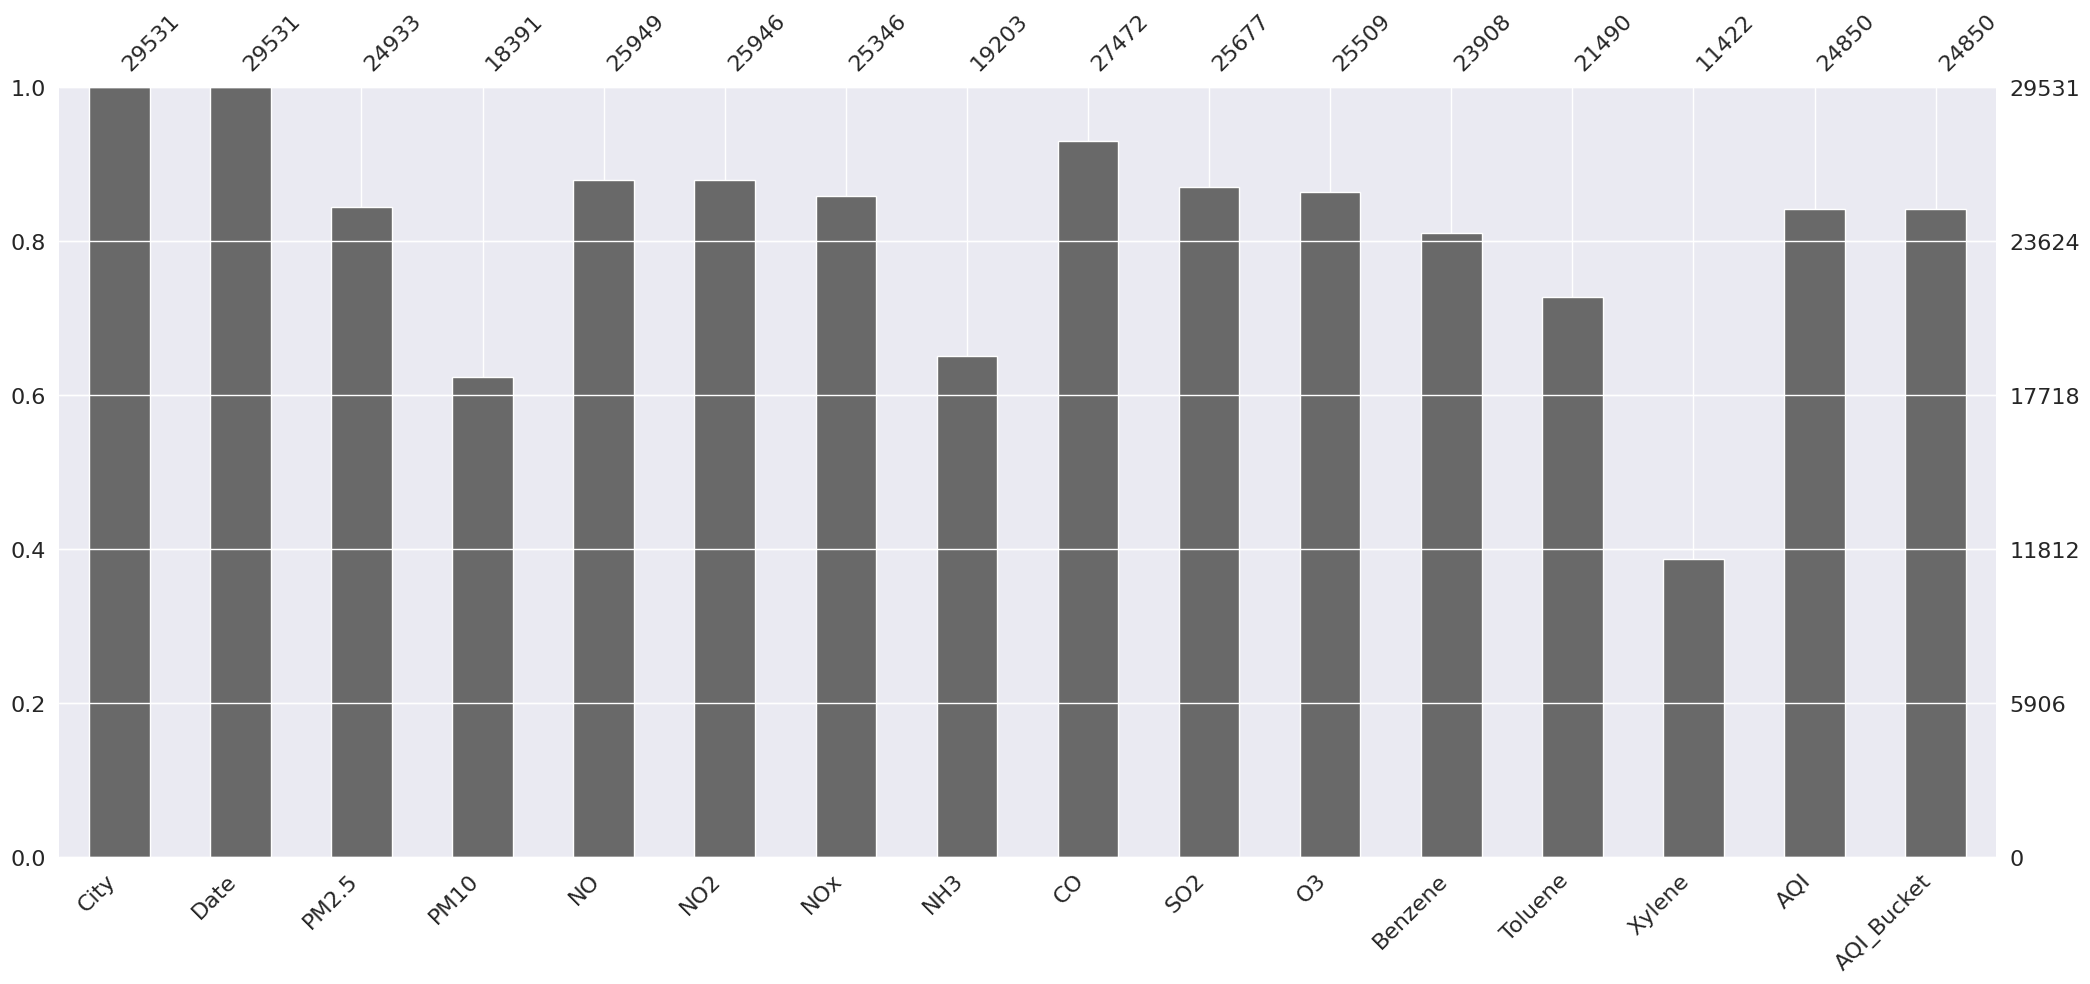

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df1= df

In [ ]:
df = df1.copy()  # Create an independent copy before modifying df1


In [ ]:
df1.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
df1['City'].replace(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], inplace=True)
df1

<ipython-input-14-5543675a771c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['City'].replace(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
<ipython-input-14-5543675a771c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['City'].replace(['Ahmedabad', 'Aizawl', 'Amaravati',

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,1,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,1,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,1,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,1,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,1,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,26,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,26,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,26,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,26,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
#checking outlier in PM2.5
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['PM2.5'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 1982
max outlier value: 949.99
min outlier value: 158.25


In [ ]:
#finding median value for PM2.5

med_val = df1['PM2.5'].median()

#replacing null with median value
df1['PM2.5'] = df1['PM2.5'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
#checking outlier in PM10
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['PM10'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 1057
max outlier value: 1000.0
min outlier value: 290.3


In [ ]:
#finding median value for PM10

med_val = df1['PM10'].median()

#replacing null with median value
df1['PM10'] = df1['PM10'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
#checking outlier in NO
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['NO'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 2459
max outlier value: 390.68
min outlier value: 41.44


In [ ]:
#finding median value for NO

med_val = df1['NO'].median()

#replacing null with median value
df1['NO'] = df1['NO'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
#checking outlier in NO2
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['NO2'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 1188
max outlier value: 362.21
min outlier value: 76.43


In [ ]:
#finding median value for NO2

med_val = df1['NO2'].median()

#replacing null with median value
df1['NO2'] = df1['NO2'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
#checking outlier in NOx
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['NOx'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 1868
max outlier value: 467.63
min outlier value: 81.09


In [ ]:
#finding median value for NOx

med_val = df1['NOx'].median()

#replacing null with median value
df1['NOx'] = df1['NOx'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,10328
CO,2059
SO2,3854


In [ ]:
#checking outlier in NH3
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['NH3'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 1015
max outlier value: 352.89
min outlier value: 62.2


In [ ]:
#finding median value for NOx

med_val = df1['NH3'].median()

#replacing null with median value
df1['NH3'] = df1['NH3'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,2059
SO2,3854


In [ ]:
#checking outlier in CO
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['CO'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 2475
max outlier value: 175.81
min outlier value: 2.87


In [ ]:
#finding median value for CO

med_val = df1['CO'].median()

#replacing null with median value
df1['CO'] = df1['CO'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,3854


In [ ]:
#checking outlier in SO2
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['SO2'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 2578
max outlier value: 193.86
min outlier value: 29.56


In [ ]:
#finding median value for SO2

med_val = df1['SO2'].median()

#replacing null with median value
df1['SO2'] = df1['SO2'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
#checking outlier in O3
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['O3'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 713
max outlier value: 257.73
min outlier value: 85.66


In [ ]:
#finding median value for O3

med_val = df1['O3'].median()

#replacing null with median value
df1['O3'] = df1['O3'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
#checking outlier in Benzene
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['Benzene'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 1668
max outlier value: 455.03
min outlier value: 7.54


In [ ]:
#finding median value for Benzene

med_val = df1['Benzene'].median()

#replacing null with median value
df1['Benzene'] = df1['Benzene'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
#checking outlier in Toluene
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['Toluene'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 2427
max outlier value: 454.85
min outlier value: 21.98


In [ ]:
#finding median value for Toluene

med_val = df1['Toluene'].median()

#replacing null with median value
df1['Toluene'] = df1['Toluene'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
#checking outlier in Xylene
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['Xylene'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 1119
max outlier value: 170.37
min outlier value: 8.17


In [ ]:
#finding median value for Xylene

med_val = df1['Xylene'].median()

#replacing null with median value
df1['Xylene'] = df1['Xylene'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
#checking outlier in AQI
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['AQI'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 1358
max outlier value: 2049.0
min outlier value: 399.0


In [ ]:
#finding median value for AQI

med_val = df1['AQI'].median()

#replacing null with median value
df1['AQI'] = df1['AQI'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
df1.AQI_Bucket.unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [ ]:
df1['AQI_Bucket'].replace(['Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good'],
                        [1, 2, 3, 4, 5, 6], inplace=True)
df1

<ipython-input-42-cc328f0e60e5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['AQI_Bucket'].replace(['Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good'],
<ipython-input-42-cc328f0e60e5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['AQI_Bucket'].replace(['Poor', 'Very Po

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,1,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,NaN
1,1,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,NaN
2,1,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,NaN
3,1,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,NaN
4,1,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,26,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,6.0
29527,26,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,5.0
29528,26,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,5.0
29529,26,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,5.0


In [ ]:
#checking outlier in AQI_Bucket
def find_outliers_IQR(df1):

   q1=df1.quantile(0.25)

   q3=df1.quantile(0.75)

   IQR=q3-q1

   outliers = df1[((df1<(q1-1.5*IQR)) | (df1>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df1['AQI_Bucket'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [ ]:
#finding median value for AQI_Bucket

med_val = df1['AQI_Bucket'].median()

#replacing null with median value
df1['AQI_Bucket'] = df1['AQI_Bucket'].fillna(med_val)
df1.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Split 'Date' into 'Year', 'Month', and 'Day' columns
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day

# Drop the original 'Date' column if necessary
df1 = df1.drop('Date', axis=1)

# Save or display the updated dataset
df1.head()  # Display the first few rows
# data.to_csv('city_day_updated.csv', index=False)  # Save the updated da

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
0,1,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,4.0,2015,1,1
1,1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,4.0,2015,1,2
2,1,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,4.0,2015,1,3
3,1,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,4.0,2015,1,4
4,1,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,4.0,2015,1,5


In [ ]:
correlation = df1.corr()
correlation

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
City,1.000000,0.062446,-0.021395,0.047182,-0.078589,0.024948,-0.182565,-0.255886,-0.101327,0.001530,0.002070,-0.062730,-0.047806,-0.121778,0.001754,0.032550,0.018314,0.000181
PM2.5,0.062446,1.000000,0.520767,0.435245,0.358287,0.375938,0.164615,0.093695,0.120451,0.166064,0.030539,0.132609,0.087813,0.633654,-0.557488,-0.170771,0.041722,-0.009835
PM10,-0.021395,0.520767,1.000000,0.433864,0.352396,0.416523,0.200548,0.023932,0.165468,0.208398,0.027522,0.126400,0.030257,0.447686,-0.516528,-0.067119,-0.012204,-0.019463
NO,0.047182,0.435245,0.433864,1.000000,0.465848,0.747409,0.155804,0.221445,0.174881,0.020788,0.045202,0.151930,0.084393,0.438039,-0.318140,0.009100,0.026233,-0.003483
NO2,-0.078589,0.358287,0.352396,0.465848,1.000000,0.581938,0.151731,0.361750,0.388413,0.289435,0.042179,0.297913,0.188965,0.531952,-0.358147,-0.041194,0.033157,-0.006954
NOx,0.024948,0.375938,0.416523,0.747409,0.581938,1.000000,0.129433,0.231878,0.205912,0.089095,0.049004,0.184764,0.085447,0.436282,-0.358159,-0.003627,0.022637,-0.006290
NH3,-0.182565,0.164615,0.200548,0.155804,0.151731,0.129433,1.000000,-0.014252,-0.048679,0.076295,0.004093,0.020040,-0.030328,0.097916,-0.126349,-0.116269,0.013439,0.001734
CO,-0.255886,0.093695,0.023932,0.221445,0.361750,0.231878,-0.014252,1.000000,0.476784,0.043311,0.066022,0.285559,0.181215,0.650475,-0.173166,-0.057421,-0.001473,0.001251
SO2,-0.101327,0.120451,0.165468,0.174881,0.388413,0.205912,-0.048679,0.476784,1.000000,0.160489,0.038955,0.273314,0.249808,0.454182,-0.233037,0.059695,-0.025747,-0.002498
O3,0.001530,0.166064,0.208398,0.020788,0.289435,0.089095,0.076295,0.043311,0.160489,1.000000,0.023982,0.135498,0.084323,0.199100,-0.229054,-0.005868,-0.081535,-0.003337


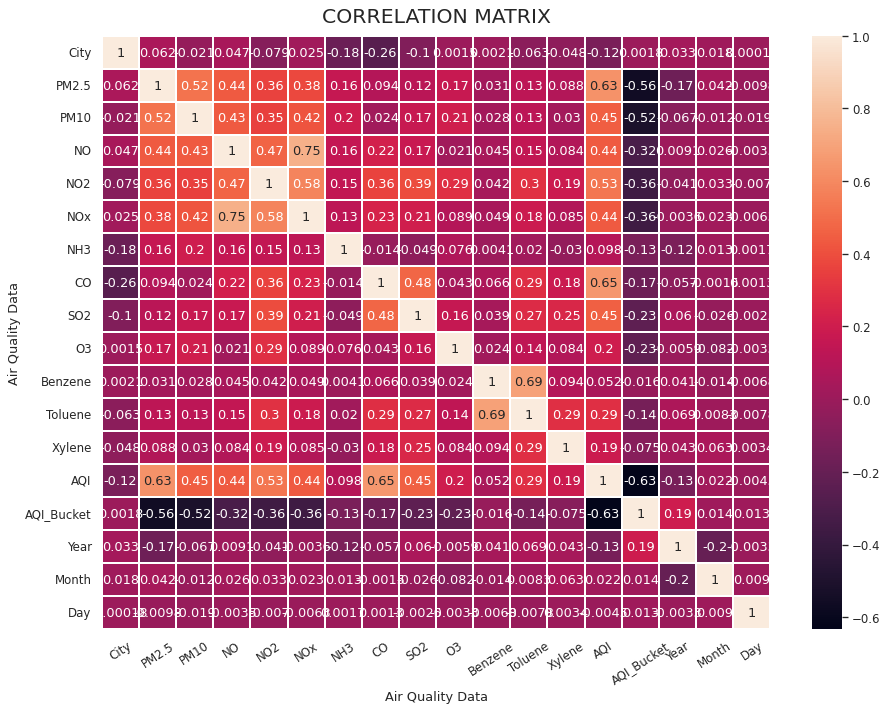

In [ ]:
plt.figure(figsize=(14,10), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Air Quality Data')
plt.ylabel('Air Quality Data')
plt.xticks(rotation=33)
plt.show()

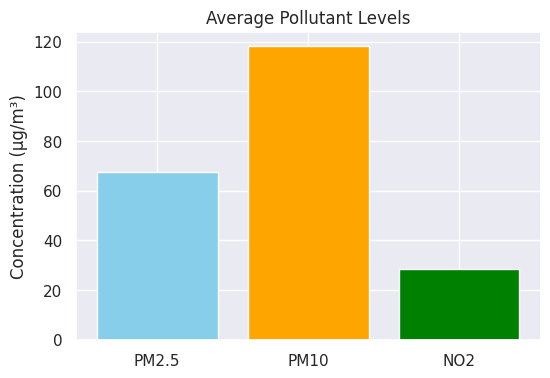

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(["PM2.5", "PM10", "NO2"], df[["PM2.5", "PM10", "NO2"]].mean(), color=['skyblue', 'orange', 'green'])
plt.title("Average Pollutant Levels")
plt.ylabel("Concentration (µg/m³)")
plt.show()

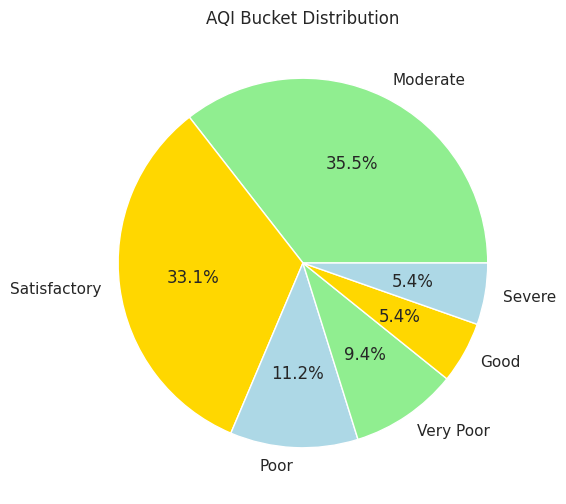

In [ ]:
# Pie Chart: Distribution of AQI Buckets
plt.figure(figsize=(6, 6))
df["AQI_Bucket"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'gold', 'lightblue'])
plt.title("AQI Bucket Distribution")
plt.ylabel("")  # Remove y-label for cleaner pie chart
plt.show()


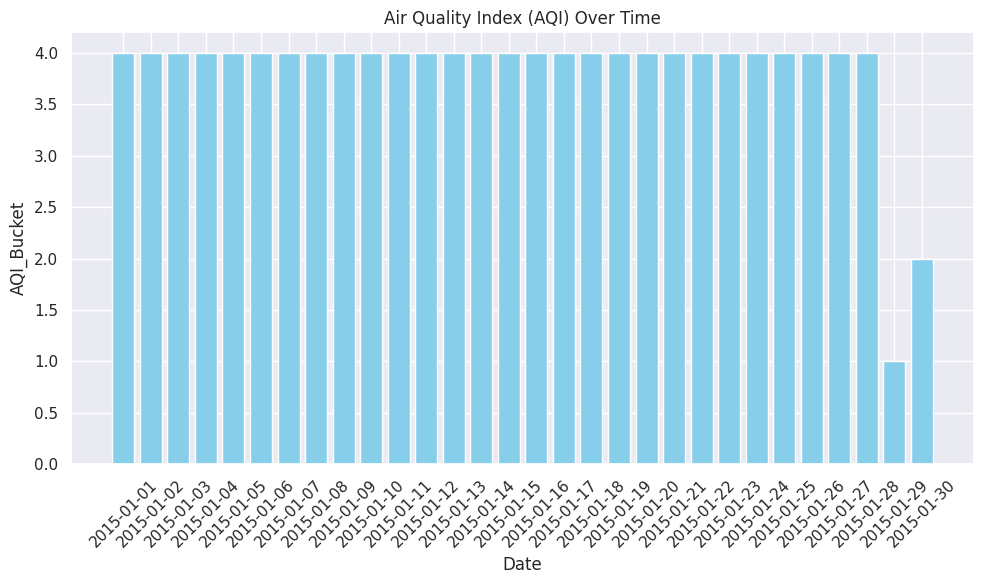

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['Date'].head(30), df1['AQI_Bucket'].head(30), color='skyblue')  # Plot the first 30 days for simplicity
plt.title('Air Quality Index (AQI) Over Time')
plt.xlabel('Date')
plt.ylabel('AQI_Bucket')
plt.xticks(rotation=45)  # Rotate the dates for better visibility
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [ ]:
x=df1.drop('AQI_Bucket',axis=1)
y=df1['AQI_Bucket']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 42)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

       City  PM2.5    PM10     NO    NO2    NOx    NH3    CO    SO2     O3  \
22362    21  48.57   95.68   9.89  21.69  16.48  15.85  0.00   9.16  30.84   
29489    26  45.53  150.21   3.50  48.13  27.74  12.68  0.11  11.82  33.44   
20078    20  21.08   95.68  17.59  10.27   4.22  15.85  1.51   8.69  21.76   
21940    21  48.57   95.68   9.89  21.69  68.16  15.85  0.00   9.16  30.84   
8251      9  41.54   95.68   6.52  10.28  10.12  15.85  1.67   4.90  55.50   
...     ...    ...     ...    ...    ...    ...    ...   ...    ...    ...   
21575    20  21.75   95.68   7.97  18.64  16.24   2.02  0.91   4.19  26.03   
5390      5  38.06   74.54   9.91  42.23  22.62  15.85  1.04   3.20  25.89   
860       1  48.57   95.68   9.89  21.69  23.52  15.85  0.89   9.16  30.84   
15795    15  36.08   95.82   5.67  31.21  18.75  15.34  0.70   5.92  48.88   
23654    21  65.29  121.72  23.97  36.28  59.59  34.63  1.01   9.91  19.03   

       Benzene  Toluene  Xylene    AQI  Year  Month  Day  
2236

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
SVCclassifier = SVC()
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))


from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

         1.0       0.97      0.84      0.90       829
         2.0       0.86      0.97      0.91       705
         3.0       1.00      0.83      0.91       406
         4.0       0.92      0.99      0.95      4094
         5.0       0.83      0.90      0.86      2441
         6.0       0.00      0.00      0.00       385

    accuracy                           0.90      8860
   macro avg       0.76      0.75      0.76      8860
weighted avg       0.86      0.90      0.88      8860

SVC accuracy: 89.60%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)

# Evaluation for Random Forest
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))  # Use y_test and y_pred_rf directly

# Calculate accuracy and display as percentage
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")  # Format as percentage

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       829
         2.0       1.00      1.00      1.00       705
         3.0       1.00      1.00      1.00       406
         4.0       1.00      1.00      1.00      4094
         5.0       1.00      1.00      1.00      2441
         6.0       1.00      1.00      1.00       385

    accuracy                           1.00      8860
   macro avg       1.00      1.00      1.00      8860
weighted avg       1.00      1.00      1.00      8860

Random Forest Accuracy: 99.95%
Confusion Matrix:
 [[ 828    1    0    0    0    0]
 [   1  703    1    0    0    0]
 [   0    1  405    0    0    0]
 [   0    0    0 4094    0    0]
 [   0    0    0    0 2441    0]
 [   0    0    0    0    0  385]]


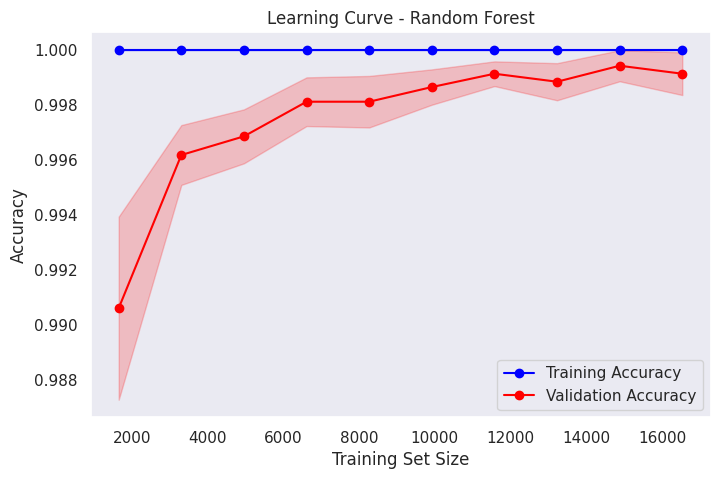

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define training sizes
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(random_state=42, n_estimators=100),
    x_train, y_train,
    cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),  # Train on 10% to 100% of data
    n_jobs=-1
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')

# Fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')

# Labels and title
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

# Evaluation for Decision Tree
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       829
         2.0       1.00      1.00      1.00       705
         3.0       1.00      1.00      1.00       406
         4.0       1.00      1.00      1.00      4094
         5.0       1.00      1.00      1.00      2441
         6.0       1.00      1.00      1.00       385

    accuracy                           1.00      8860
   macro avg       1.00      1.00      1.00      8860
weighted avg       1.00      1.00      1.00      8860

Accuracy: 1.0
Confusion Matrix:
 [[ 829    0    0    0    0    0]
 [   0  705    0    0    0    0]
 [   0    0  406    0    0    0]
 [   0    0    0 4094    0    0]
 [   0    0    0    0 2441    0]
 [   0    0    0    0    0  385]]


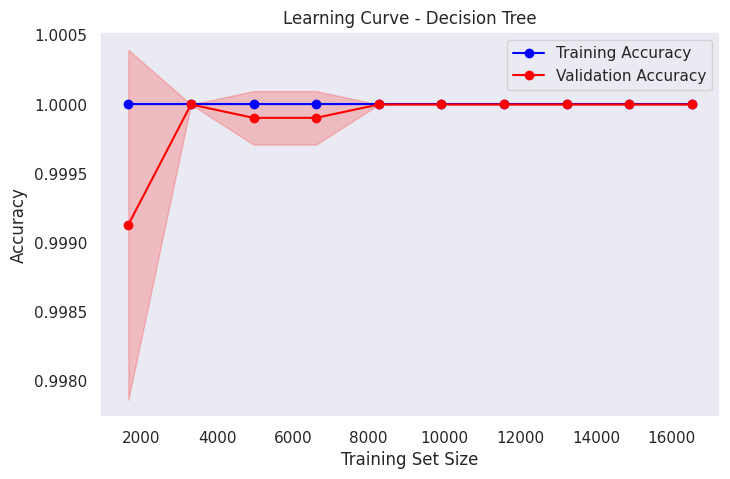

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define training sizes
train_sizes, train_scores, val_scores = learning_curve(
    DecisionTreeClassifier(random_state=42),  # Model
    x_train, y_train,
    cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),  # Train on 10% to 100% of data
    n_jobs=-1
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')

# Fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')

# Labels and title
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Decision Tree")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0964
Epoch 2/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0300
Epoch 3/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0241
Epoch 4/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0202
Epoch 5/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0187
Epoch 6/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0169
Epoch 7/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0163
Epoch 8/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0156
Epoch 9/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0149
Epoch 10/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0143
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training RMSE: 0.59
Test RMSE: 0.59
Training MAE: 0.42
Test MAE: 0.42
Training R-squared: 0.79
Test R-squared: 0.79


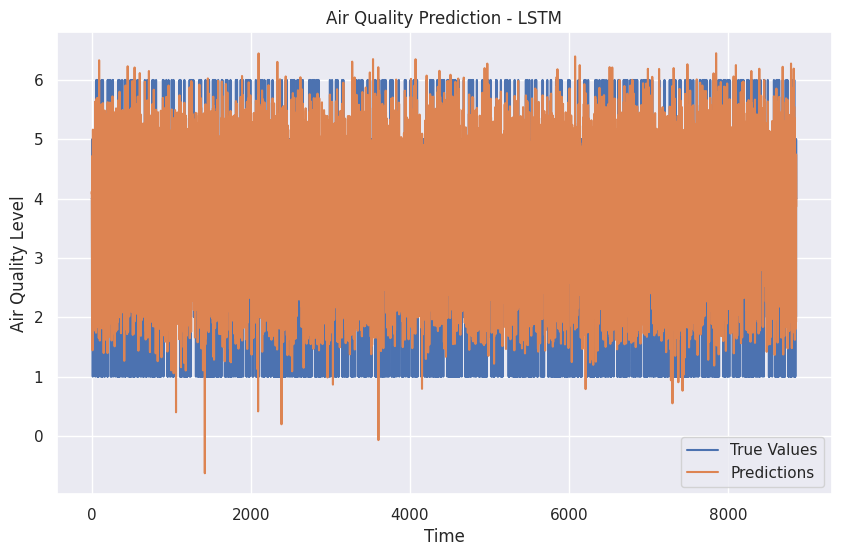

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Scale features and target (use MinMaxScaler to scale values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(x)  # Scale the features
Y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))  # Scale the target

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

# Reshape data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Output layer

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=10, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions and targets back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform(Y_train)
Y_test = scaler.inverse_transform(Y_test)

# Calculate evaluation metrics
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))
train_mae = mean_absolute_error(Y_train, train_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
train_r2 = r2_score(Y_train, train_predict)
test_r2 = r2_score(Y_test, test_predict)

# Print metrics
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Training R-squared: {train_r2:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='True Values')
plt.plot(test_predict, label='Predictions')
plt.title('Air Quality Prediction - LSTM')
plt.xlabel('Time')
plt.ylabel('Air Quality Level')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define your classifiers
svc = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

# Step 2: Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('svc', svc), ('rf', rf), ('lr', lr)], voting='hard')

# Step 3: Train the Voting Classifier on your data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
voting_clf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = voting_clf.predict(X_test)

# Step 5: Evaluate the performance
print(classification_report(y_test, y_pred))  # Shows precision, recall, f1-score
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy * 100:.2f}%')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95       829
         2.0       0.93      0.98      0.95       705
         3.0       1.00      0.95      0.97       406
         4.0       0.97      0.99      0.98      4094
         5.0       0.93      0.96      0.94      2441
         6.0       1.00      0.65      0.79       385

    accuracy                           0.96      8860
   macro avg       0.97      0.91      0.93      8860
weighted avg       0.96      0.96      0.96      8860

Voting Classifier Accuracy: 95.67%


In [ ]:
# Converted the LSTM model to a multi-class classification setup with softmax activation and categorical_crossentropy loss.

# Replace missing 'AQI_Bucket' values with the median
med_val = df1['AQI_Bucket'].median()
df1['AQI_Bucket'] = df1['AQI_Bucket'].fillna(med_val)

# Split data into features (X) and target (y)
X = df1.drop('AQI_Bucket', axis=1)
y = df1['AQI_Bucket']

# Adjust labels to be zero-indexed for categorical conversion
y = y - 1

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert target to categorical format
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

# Build and train an LSTM model
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(units=6, activation='softmax'))  # Output layer for 6 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train_scaled, y_train)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4571 - loss: 1.4634 - val_accuracy: 0.6141 - val_loss: 0.9807
Epoch 2/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6454 - loss: 0.9162 - val_accuracy: 0.7060 - val_loss: 0.7438
Epoch 3/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7238 - loss: 0.7124 - val_accuracy: 0.7537 - val_loss: 0.6243
Epoch 4/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7673 - loss: 0.6121 - val_accuracy: 0.7942 - val_loss: 0.5503
Epoch 5/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7934 - loss: 0.5523 - val_accuracy: 0.8035 - val_loss: 0.5005
Epoch 6/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8185 - loss: 0.4965 - val_accuracy: 0.8239 - val_loss: 0.4558
Epoch 7/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8339 - loss: 0.4576 - val_accuracy: 0.8533 - val_loss: 0.4206
Epoch 8/10
646/646 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8503 - loss: 0.4198 - val_accuracy: 0.8677 - val_

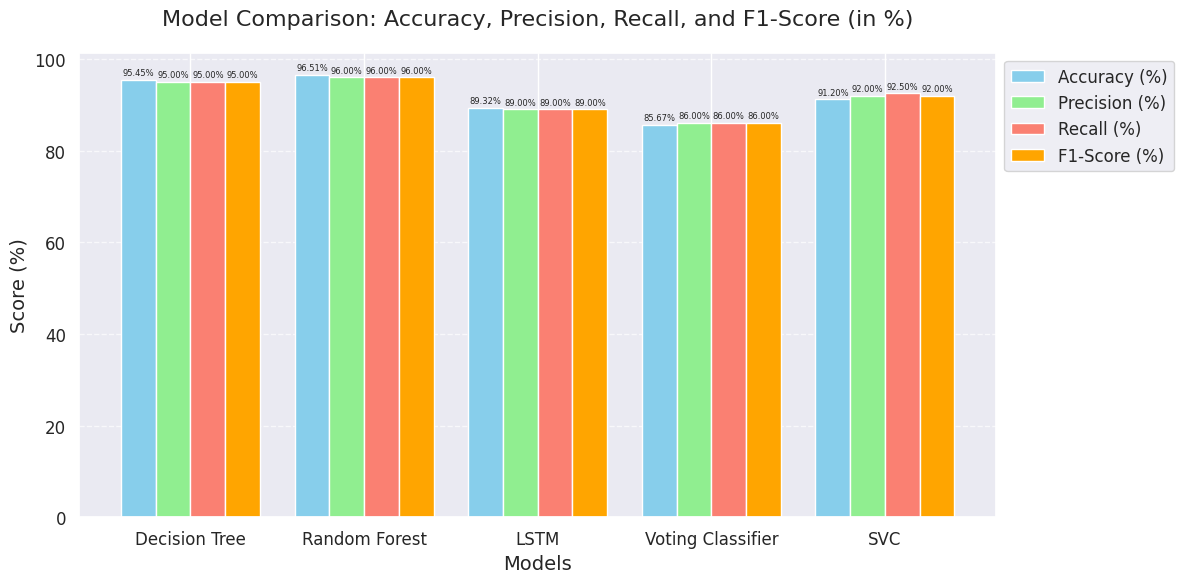

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Decision Tree', 'Random Forest', 'LSTM', 'Voting Classifier', 'SVC']

# Metrics for each model (replace with your actual values)
accuracy = [95.45, 96.51, 89.32, 85.67, 91.20]  # Accuracy in %
precision = [95.0, 96.0, 89.0, 86.0, 92.0]     # Precision in %
recall = [95.0, 96.0, 89.0, 86.0, 92.5]        # Recall in %
f1_score = [95.0, 96.0, 89.0, 86.0, 92.0]      # F1-Score in %

# Set up the plot
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(12, 6))

# Create bars for each metric
plt.bar(x - 1.5 * width, accuracy, width, label='Accuracy (%)', color='skyblue')
plt.bar(x - 0.5 * width, precision, width, label='Precision (%)', color='lightgreen')
plt.bar(x + 0.5 * width, recall, width, label='Recall (%)', color='salmon')
plt.bar(x + 1.5 * width, f1_score, width, label='F1-Score (%)', color='orange')

# Add labels, title, and custom x-axis tick labels
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score (%)', fontsize=14)
plt.title('Model Comparison: Accuracy, Precision, Recall, and F1-Score (in %)', fontsize=16, pad=20)
plt.xticks(x, models, fontsize=12)
plt.yticks(fontsize=12)

# Add grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Add values on top of the bars
for i in range(len(models)):
    plt.text(x[i] - 1.5 * width, accuracy[i] + 1, f'{accuracy[i]:.2f}%', ha='center', fontsize=6)
    plt.text(x[i] - 0.5 * width, precision[i] + 1, f'{precision[i]:.2f}%', ha='center', fontsize=6)
    plt.text(x[i] + 0.5 * width, recall[i] + 1, f'{recall[i]:.2f}%', ha='center', fontsize=6)
    plt.text(x[i] + 1.5 * width, f1_score[i] + 1, f'{f1_score[i]:.2f}%', ha='center', fontsize=6)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
